In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [59]:
df_rating = pd.read_csv('/content/sample_data/Books/Ratings.csv')
df_books = pd.read_csv('/content/sample_data/Books/Books.csv')
df_users = pd.read_csv('/content/sample_data/Books/Users.csv')
df_books.head()
# df_rating.head()
# df_users.head()

<ipython-input-59-ecc237245d4a>:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_books = pd.read_csv('/content/sample_data/Books/Books.csv')


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [3]:
df_images = df_books.iloc[:, -2:]
df_books = df_books.iloc[:, :-2]
# df_images.head()
df_books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...


In [4]:
userCounts = df_rating['User-ID'].value_counts()
isbnCounts = df_rating['ISBN'].value_counts()
print(isbnCounts)

0971880107     2502
0316666343     1295
0385504209      883
0060928336      732
0312195516      723
               ... 
1568656386        1
1568656408        1
1569551553        1
1570081808        1
05162443314       1
Name: ISBN, Length: 340556, dtype: int64


In [21]:
df_rating['User-ID'].unique()

array([276725, 276726, 276727, ..., 276709, 276721, 276723])

In [ ]:
df_books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    1
dtype: int64

In [ ]:
df_rating.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    1
dtype: int64

In [ ]:
df_users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [23]:
dfr = df_rating
dfr = dfr[~dfr['ISBN'].isin(isbnCounts[isbnCounts < 100].index)]

dfr = pd.merge(right=dfr, left = df_books, on="ISBN")
dfr.head()
dfr = dfr[~dfr['User-ID'].isin(userCounts[userCounts < 200].index)]
dfr = dfr.drop_duplicates(["Book-Title", "User-ID"])

In [45]:
combine_book_rating = dfr
columns = ['Year-Of-Publication', 'Book-Author', 'Image-URL-S', 'Publisher']
combine_book_rating =  combine_book_rating.drop(columns, axis=1)
combine_book_rating.head()

,ISBN,Book-Title,User-ID,Book-Rating
0,0440234743,The Testament,277478,0
5,0440234743,The Testament,2977,0
7,0440234743,The Testament,3363,0
10,0440234743,The Testament,7346,9
14,0440234743,The Testament,9856,0


In [47]:
df_for_knn = combine_book_rating
combine_book_rating.shape[0]

49136

In [49]:
# group by book titles and create a new column for total rating count
combine_book_rating = combine_book_rating.dropna(axis=0, subset = ['Book-Title'])
book_ratingCount = (combine_book_rating.groupby(by = ['Book-Title'])['Book-Rating'].count().reset_index().rename(columns={'Book-Rating': 'totalRatingCount'})[['Book-Title', 'totalRatingCount']])
book_ratingCount.head()

,Book-Title,totalRatingCount
0,1984,52
1,1st to Die: A Novel,153
2,2nd Chance,114
3,4 Blondes,72
4,A Beautiful Mind: The Life of Mathematical Gen...,46


In [50]:
combine_book_rating.shape[0]

49136

In [27]:
print(combine_book_rating.columns)
print(book_ratingCount.columns)

Index(['ISBN', 'Book-Title', 'User-ID', 'Book-Rating'], dtype='object')
Index(['Book-Title', 'totalRatingCount'], dtype='object')


In [28]:
# df = combine_book_rating;
# df = pd.DataFrame(combine_book_rating[combine_book_rating.duplicated('Book-Title', keep='first')])
# df = df.drop_duplicates()
# df.head()

df = pd.DataFrame(combine_book_rating)
combine_book_rating = df.drop_duplicates(subset=['Book-Title'])
combine_book_rating.head()

,ISBN,Book-Title,User-ID,Book-Rating
0,0440234743,The Testament,277478,0
423,0452264464,Beloved (Plume Contemporary Fiction),278418,0
608,0971880107,Wild Animus,277427,0
3109,0345402871,Airframe,11676,0
3317,0345417623,Timeline,3363,0


In [29]:
rating_with_totalRatingCount = combine_book_rating.merge(book_ratingCount, left_on = 'Book-Title', right_on = 'Book-Title')
rating_with_totalRatingCount.head()

,ISBN,Book-Title,User-ID,Book-Rating,totalRatingCount
0,0440234743,The Testament,277478,0,150
1,0452264464,Beloved (Plume Contemporary Fiction),278418,0,53
2,0971880107,Wild Animus,277427,0,365
3,0345402871,Airframe,11676,0,96
4,0345417623,Timeline,3363,0,129


In [30]:
print(book_ratingCount['totalRatingCount'].quantile(np.arange(.9, 1, .01)))

0.90    123.60
0.91    128.00
0.92    134.00
0.93    137.96
0.94    145.04
0.95    157.40
0.96    164.24
0.97    170.84
0.98    183.00
0.99    211.96
Name: totalRatingCount, dtype: float64


In [31]:
popularity_threshold = 211
rating_popular_book = rating_with_totalRatingCount.query('totalRatingCount >= @popularity_threshold')
rating_popular_book = rating_popular_book.sort_values(by='totalRatingCount', ascending=False)
rating_popular_book.head()

,ISBN,Book-Title,User-ID,Book-Rating,totalRatingCount
2,0971880107,Wild Animus,277427,0,365
67,0316666343,The Lovely Bones: A Novel,277427,0,272
80,0312278586,The Nanny Diaries: A Novel,3363,0,225
30,0330332775,Bridget Jones's Diary,11676,0,221
142,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,3363,0,221


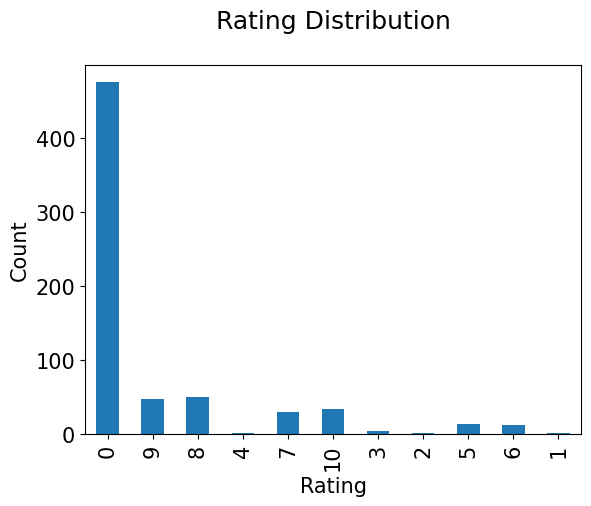

In [32]:
plt.rc('font', size=15)
combine_book_rating['Book-Rating'].value_counts(sort=False).plot(kind='bar')
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.savefig('system1.png', bbox_inches='tight')
plt.show()

In [51]:
df_for_knn.shape[0]

49136

In [52]:
df_ready = df_for_knn.pivot_table(index=['User-ID'],columns=['ISBN'],values='Book-Rating').fillna(0).T
df_ready.head()

User-ID,254,2276,2766,2977,3363,4017,4385,6242,6251,6323,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
ISBN,,,,,,,,,,,,,,,,,,,,,
002542730X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0
0060008032,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0060096195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
006016848X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0060173289,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
df_ready.index = df_ready.join(df_books.set_index('ISBN'))['Book-Title']
df_ready.head()

User-ID,254,2276,2766,2977,3363,4017,4385,6242,6251,6323,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
Politically Correct Bedtime Stories: Modern Tales for Our Life and Times,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0
Angels,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Boy Next Door,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Men Are from Mars, Women Are from Venus: A Practical Guide for Improving Communication and Getting What You Want in Your Relationships",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Divine Secrets of the Ya-Ya Sisterhood : A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [88]:
from sklearn.neighbors import NearestNeighbors

In [89]:
from sklearn.model_selection import train_test_split

In [102]:
# Model training and testing
train, test = train_test_split(df_ready, test_size=0.2, random_state=42)
test_model = NearestNeighbors(metric='cosine')
test_model.fit(train.values)

NearestNeighbors(metric='cosine')

In [96]:
# def get_recommends(title = ""):
#   try:
#     book = train.loc[title]
#   except KeyError as e:
#     print('The given book', e, 'does not exist')
#     return

#   distance, indice = test_model.kneighbors([book.values], n_neighbors=6)

#   df_recommended_books_train = pd.DataFrame({
#       'Book-Title'   : train.iloc[indice[0]].index.values,
#       'Distance': distance[0]
#     }) \
#     .sort_values(by='Distance', ascending=False) \
#     .head(5).values

#   return [title, df_recommended_books_train]

# get_recommends("The Queen of the Damned (Vampire Chronicles (Paperback))")

In [110]:
print(test.columns)

Int64Index([   254,   2276,   2766,   2977,   3363,   4017,   4385,   6242,
              6251,   6323,
            ...
            274004, 274061, 274301, 274308, 274808, 275970, 277427, 277478,
            277639, 278418],
           dtype='int64', name='User-ID', length=888)


In [117]:
# userid = 4017
# user_ratings = test.loc[userid]
# predicted_ratings = test_model.predict(user_ratings.values.reshape(1, -1))

In [70]:
# Actual Implementation
model = NearestNeighbors(metric='cosine')
model.fit(df_ready.values)

NearestNeighbors(metric='cosine')

In [71]:
title = 'The Queen of the Damned (Vampire Chronicles (Paperback))'
df_ready.loc[title].shape

(888,)

In [72]:
distance, indice = model.kneighbors([df_ready.loc[title].values], n_neighbors=6)

print(distance)
print(indice)

[[1.11022302e-16 5.17841186e-01 5.37633845e-01 7.34506886e-01
  7.44865700e-01 7.93983542e-01]]
[[136 126 152 127 151 641]]


In [79]:
df_ready.iloc[indice[0]].index.values

array(['The Queen of the Damned (Vampire Chronicles (Paperback))',
       'The Vampire Lestat (Vampire Chronicles, Book II)',
       'The Tale of the Body Thief (Vampire Chronicles (Paperback))',
       'Interview with the Vampire',
       'The Witching Hour (Lives of the Mayfair Witches)', 'Catch 22'],
      dtype=object)

In [84]:
pd.DataFrame({
    'Book-Title'   : df_ready.iloc[indice[0]].index.values,
    'Distance': distance[0]
}) \
.sort_values(by='Distance', ascending=True)

,Book-Title,Distance
0,The Queen of the Damned (Vampire Chronicles (P...,1.110223e-16
1,"The Vampire Lestat (Vampire Chronicles, Book II)",5.178412e-01
2,The Tale of the Body Thief (Vampire Chronicles...,5.376338e-01
3,Interview with the Vampire,7.345069e-01
4,The Witching Hour (Lives of the Mayfair Witches),7.448657e-01
5,Catch 22,7.939835e-01


In [86]:
def get_recommends(title = ""):
  try:
    book = df_ready.loc[title]
  except KeyError as e:
    print('The given book', e, 'does not exist')
    return

  distance, indice = model.kneighbors([book.values], n_neighbors=6)

  df_recommended_books = pd.DataFrame({
      'Book-Title'   : df_ready.iloc[indice[0]].index.values,
      'Distance': distance[0]
    }) \
    .sort_values(by='Distance', ascending=False) \
    .head(5).values

  return [title, df_recommended_books]

In [87]:
get_recommends("The Queen of the Damned (Vampire Chronicles (Paperback))")

['The Queen of the Damned (Vampire Chronicles (Paperback))',
 array([['Catch 22', 0.7939835419270879],
        ['The Witching Hour (Lives of the Mayfair Witches)',
         0.7448657003312193],
        ['Interview with the Vampire', 0.7345068863988313],
        ['The Tale of the Body Thief (Vampire Chronicles (Paperback))',
         0.5376338446489461],
        ['The Vampire Lestat (Vampire Chronicles, Book II)',
         0.5178411864186412]], dtype=object)]